# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 603


In [3]:
#verify that code ran successfully
print(cities[233])

ixtapa


In [4]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"
print(base_url)

https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=0bab3b5c406d499a94d0b25cdeeaf7a4


---

In [5]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | katobu
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | egvekinot
Processing Record 6 of Set 1 | hue
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | catuday
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | coolum beach
Processing Record 16 of Set 1 | nizhniy baskunchak
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | illoqqortoormiut
'coord'
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | yar-sale
Processing Record 21 of Set 1 | hami
Processing Record 22 of Set 1 | adrar
Processing Record 23 of Set 1 | 

Processing Record 45 of Set 4 | ugoofaaru
Processing Record 46 of Set 4 | mys shmidta
'coord'
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | fuerte
Processing Record 49 of Set 4 | haines junction
Processing Record 0 of Set 5 | east london
Processing Record 1 of Set 5 | saint anthony
Processing Record 2 of Set 5 | tual
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | warqla
'coord'
Processing Record 5 of Set 5 | meulaboh
Processing Record 6 of Set 5 | kaitangata
Processing Record 7 of Set 5 | skogn
Processing Record 8 of Set 5 | mareeba
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | santa isabel
Processing Record 11 of Set 5 | vila velha
Processing Record 12 of Set 5 | poli
Processing Record 13 of Set 5 | bolungarvik
'coord'
Processing Record 14 of Set 5 | formoso do araguaia
'coord'
Processing Record 15 of Set 5 | okhotsk
Processing Record 16 of Set 5 | torbay
Processing Record 17 of Set 5 | bud
Processing 

Processing Record 42 of Set 8 | troitsko-pechorsk
Processing Record 43 of Set 8 | bethel
Processing Record 44 of Set 8 | farah
Processing Record 45 of Set 8 | tabat
Processing Record 46 of Set 8 | camp verde
Processing Record 47 of Set 8 | the colony
Processing Record 48 of Set 8 | satipo
Processing Record 49 of Set 8 | chicama
Processing Record 0 of Set 9 | porto novo
Processing Record 1 of Set 9 | bathsheba
Processing Record 2 of Set 9 | saint-francois
Processing Record 3 of Set 9 | coahuayana
Processing Record 4 of Set 9 | tuatapere
Processing Record 5 of Set 9 | paradwip
'coord'
Processing Record 6 of Set 9 | kalamb
Processing Record 7 of Set 9 | pontes e lacerda
Processing Record 8 of Set 9 | molina
Processing Record 9 of Set 9 | itajobi
Processing Record 10 of Set 9 | simpang
Processing Record 11 of Set 9 | ewa beach
Processing Record 12 of Set 9 | tezu
Processing Record 13 of Set 9 | beloha
Processing Record 14 of Set 9 | dekar
Processing Record 15 of Set 9 | placer
Processing R

Processing Record 36 of Set 12 | yazoo city
Processing Record 37 of Set 12 | zyryanka
Processing Record 38 of Set 12 | hovd
Processing Record 39 of Set 12 | belyy yar
Processing Record 40 of Set 12 | atar
Processing Record 41 of Set 12 | piacabucu
Processing Record 42 of Set 12 | whitianga
Processing Record 43 of Set 12 | tarbagatay
Processing Record 44 of Set 12 | benemerito de las americas
Processing Record 45 of Set 12 | cap malheureux
Processing Record 46 of Set 12 | kushmurun
Processing Record 47 of Set 12 | solenzo
Processing Record 48 of Set 12 | bandarbeyla
Processing Record 49 of Set 12 | ginir
Processing Record 0 of Set 13 | chekhov
Processing Record 1 of Set 13 | sur
Processing Record 2 of Set 13 | bauchi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)                       
                          
# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constitucion,-35.3333,-72.4167,14.17,76,98,3.26,CL,1687191071
1,ushuaia,-54.8000,-68.3000,4.81,70,0,2.57,AR,1687190937
2,katobu,-4.9408,122.5276,22.72,85,66,1.96,ID,1687191072
3,bluff,-46.6000,168.3333,7.77,88,25,3.19,NZ,1687190923
4,egvekinot,66.3167,-179.1667,2.50,88,100,1.81,RU,1687191073


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output data/mod_6_cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output data/mod_6_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constitucion,-35.3333,-72.4167,14.17,76,98,3.26,CL,1687191071
1,ushuaia,-54.8000,-68.3000,4.81,70,0,2.57,AR,1687190937
2,katobu,-4.9408,122.5276,22.72,85,66,1.96,ID,1687191072
3,bluff,-46.6000,168.3333,7.77,88,25,3.19,NZ,1687190923
4,egvekinot,66.3167,-179.1667,2.50,88,100,1.81,RU,1687191073


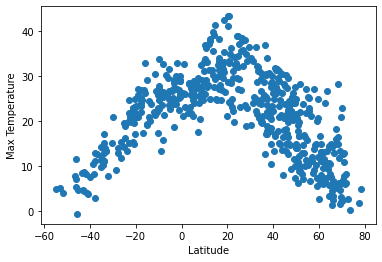

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

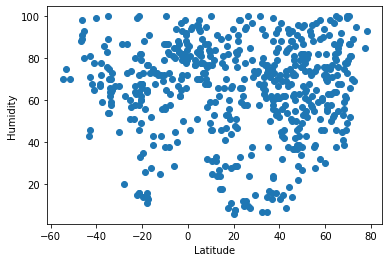

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

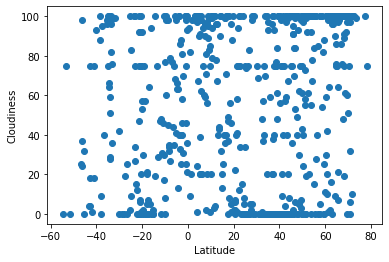

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

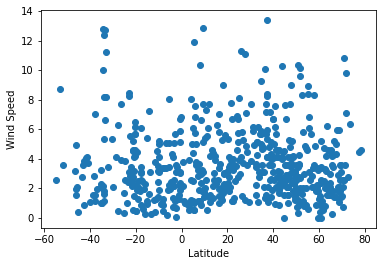

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output data/Fig4.png")

# Show plot
plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = pd.DataFrame(city_data_df[city_data_df.Lat >0])

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,egvekinot,66.3167,-179.1667,2.50,88,100,1.81,RU,1687191073
5,hue,16.4667,107.6000,30.06,70,40,1.03,VN,1687191073
6,tura,25.5198,90.2201,23.16,95,74,2.95,IN,1687190948
8,catuday,16.2923,119.8062,27.10,76,36,1.45,PH,1687191074
15,nizhniy baskunchak,48.2198,46.8311,21.05,29,0,5.19,RU,1687191078


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = pd.DataFrame(city_data_df[city_data_df.Lat <0])

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constitucion,-35.3333,-72.4167,14.17,76,98,3.26,CL,1687191071
1,ushuaia,-54.8000,-68.3000,4.81,70,0,2.57,AR,1687190937
2,katobu,-4.9408,122.5276,22.72,85,66,1.96,ID,1687191072
3,bluff,-46.6000,168.3333,7.77,88,25,3.19,NZ,1687190923
7,busselton,-33.6500,115.3333,14.07,70,100,6.64,AU,1687190915


In [16]:
# Define a function to create Linear Regression plots

def linear_regression(x,y,z):
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x,y)
    p_y = p_slope * x + p_int
    plt.plot(x,p_y,"r--")
    plt.scatter(x,y)
    line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))
    plt.annotate(line_eq,z,fontsize=15,color="red")
    print(f"R Value: {p_r}")

###  Temperature vs. Latitude Linear Regression Plot

R Value: -0.7261545640780228


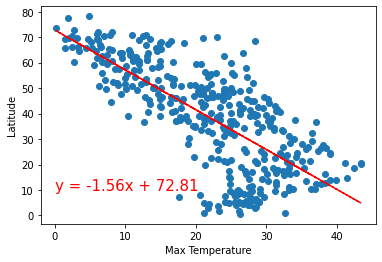

In [17]:
# Linear regression on Northern Hemisphere
linear_regression(north_hem_df["Max Temp"],north_hem_df["Lat"],(0,10))
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.show()

R Value: 0.8759239956651254


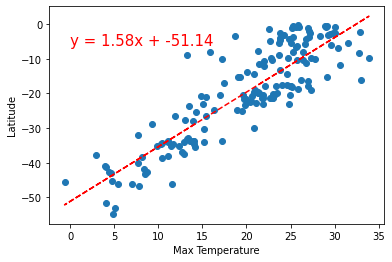

In [23]:
# Linear regression on Southern Hemisphere
linear_regression(south_hem_df["Max Temp"],south_hem_df["Lat"],(0,-6))
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.show()

As anticipated, as we progress closer to the equator, max temperatures on average rise. 

### Humidity vs. Latitude Linear Regression Plot

R Value: 0.06881204687671111


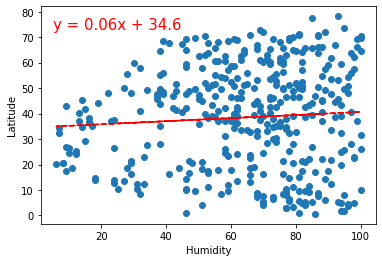

In [34]:
# Northern Hemisphere
linear_regression(north_hem_df["Humidity"],north_hem_df["Lat"],(5,73))
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

R Value: 0.01616042661041645


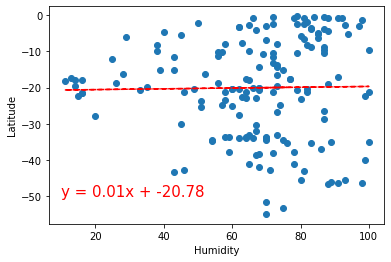

In [40]:
# Southern Hemisphere
linear_regression(south_hem_df["Humidity"],south_hem_df["Lat"],(10,-50))
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

Interestingly - distribution for more humid locations is significanty higher and appearing to split 60/40 between equator proximate and non-proximate locations. 

### Cloudiness vs. Latitude Linear Regression Plot

R Value: 0.07329144029189452


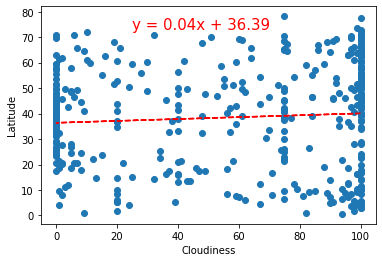

In [43]:
# Northern Hemisphere
linear_regression(north_hem_df["Cloudiness"],north_hem_df["Lat"],(25,73))
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.show()

R Value: 0.10932347691633562


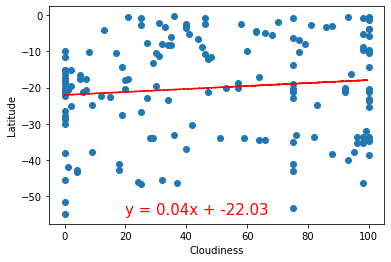

In [46]:
# Southern Hemisphere
linear_regression(south_hem_df["Cloudiness"],south_hem_df["Lat"],(20,-55))
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

R Value: -0.06626852120358631


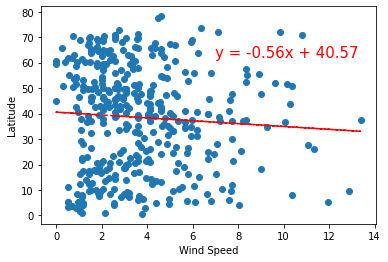

In [50]:
# Northern Hemisphere
linear_regression(north_hem_df["Wind Speed"],north_hem_df["Lat"],(7,62))
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.show()

R Value: -0.16165694504115824


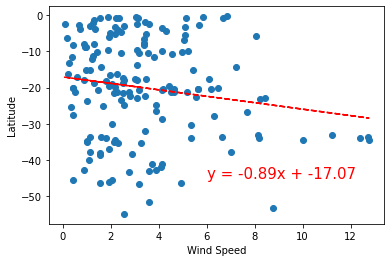

In [55]:
# Southern Hemisphere
linear_regression(south_hem_df["Wind Speed"],south_hem_df["Lat"],(6,-45))
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.show()

As expected, maximum temperature rises as we appraoch the equator. Interestingly enough, humidity remains stable across the populuous regions - north america, europe, china - and is consistent with the same trend for cloudiness; where percipitation would be naturally denser. 